In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text


plt.rcParams.update(
    {
        "axes.titlesize": 24,  # Title font size
        "axes.labelpad": 10,  # Padding for the x and y labels
        "axes.labelcolor": "dimgray",
        "xtick.labelsize": 16,  # Font size for the x tick labels
        "ytick.labelsize": 16,  # Font size for the y tick labels
        "axes.labelsize": 20,  # Font size for the x and y axis labels
        "font.family": "serif",  # Set the font family to Arial
        "grid.linestyle": "--",  # Set the style of the gridlines
        "grid.linewidth": 0.5,  # Set the width of the gridlines
        "grid.color": "gray",  # Set the color of the gridlines
        "axes.grid": True,  # Enable the grid
        "axes.grid.which": "both",  # Apply the grid to both major and minor ticks
        "xtick.direction": "in",  # Set the direction of the x tick marks
        "ytick.direction": "in",  # Set the direction of the y tick marks
        "xtick.major.size": 6,  # Set the length of the major x tick marks
        "xtick.major.width": 2,  # Set the width of the major x tick marks
        "ytick.major.size": 6,  # Set the length of the major y tick marks
        "ytick.major.width": 2,  # Set the width of the major y tick marks
        "xtick.color": "gray",  # Color of x tick labels and tick lines
        "ytick.color": "gray",  # Color of y tick labels and tick lines
    }
)


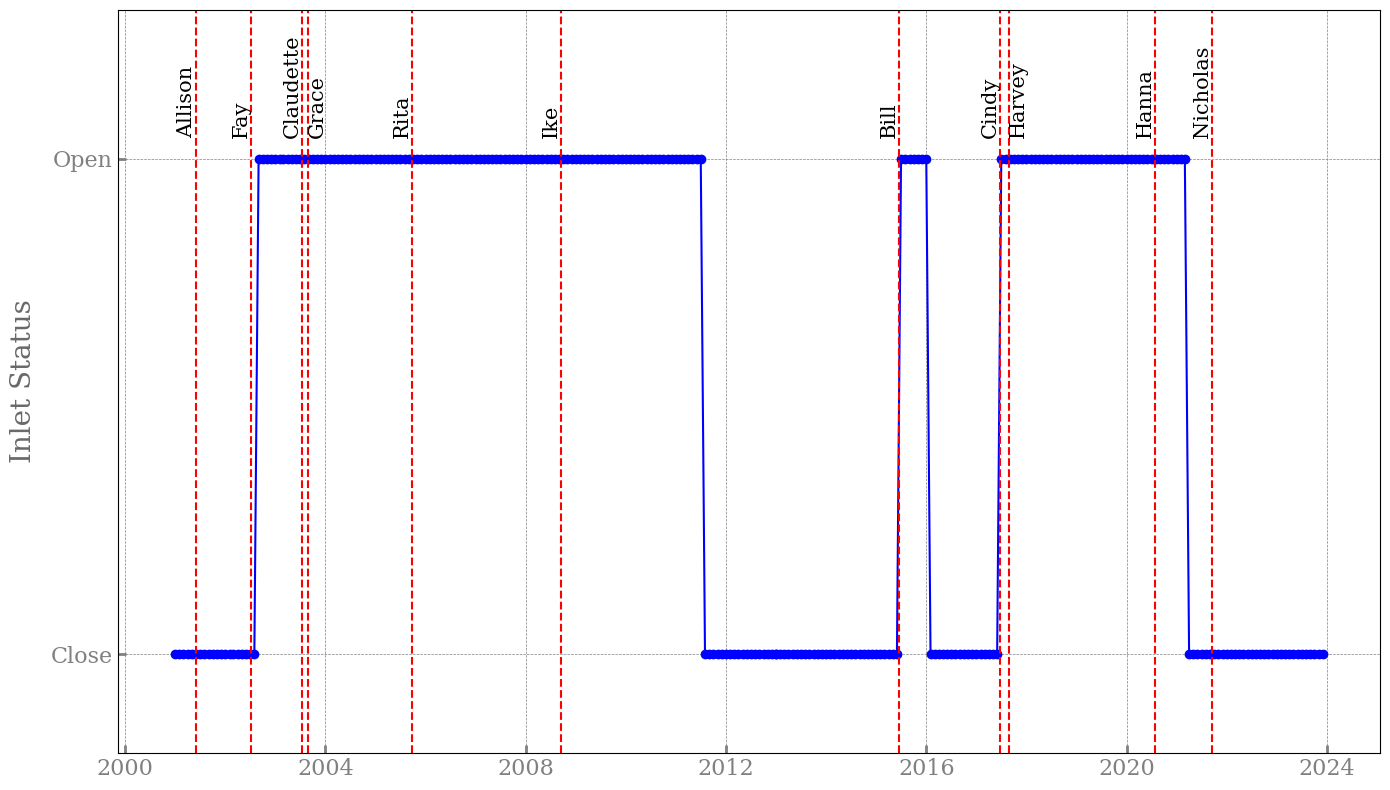

In [2]:
df = pd.read_csv("storm Impact.csv")
df["Month"] = df["Month"].apply(lambda x: x[:3])
df["Date_Str"] = df["Year"].astype(str) + "-" + df["Month"]
df["Date"] = pd.to_datetime(df["Date_Str"], format="%Y-%b")
status_mapping = {"Closed": 0, "Open": 1}
df["Status"] = df["Status"].str.strip()
df["Status_Code"] = df["Status"].map(status_mapping)

storm_data_df = pd.read_csv("Storms.csv")
storm_data_df["Date"] = pd.to_datetime(storm_data_df["Date"], format="%m/%d/%y")
storm_data_df = storm_data_df[storm_data_df["Date"] > "2000-12-31"]

plt.figure(figsize=(14, 8))
plt.plot(df["Date"], df["Status_Code"], marker="o", linestyle="-", color="blue")

for _, row in storm_data_df.iterrows():
    plt.axvline(x=row["Date"], color="red", linestyle="--", linewidth=1.5)

    if row["Name"] in ["Grace", "Harvey"]:
        ha_value = "left"
    else:
        ha_value = "right"

    plt.text(row["Date"], 1.05, row["Name"], rotation=90, ha=ha_value, fontsize=15)

plt.ylabel("Inlet Status")
plt.yticks([0, 1], ["Close", "Open"])
plt.ylim(-0.2, 1.3)
plt.tight_layout()

# Save the figure as PNG with 1200 dpi
plt.savefig("timeline_storm_impact.png", dpi=1200)
plt.show()
